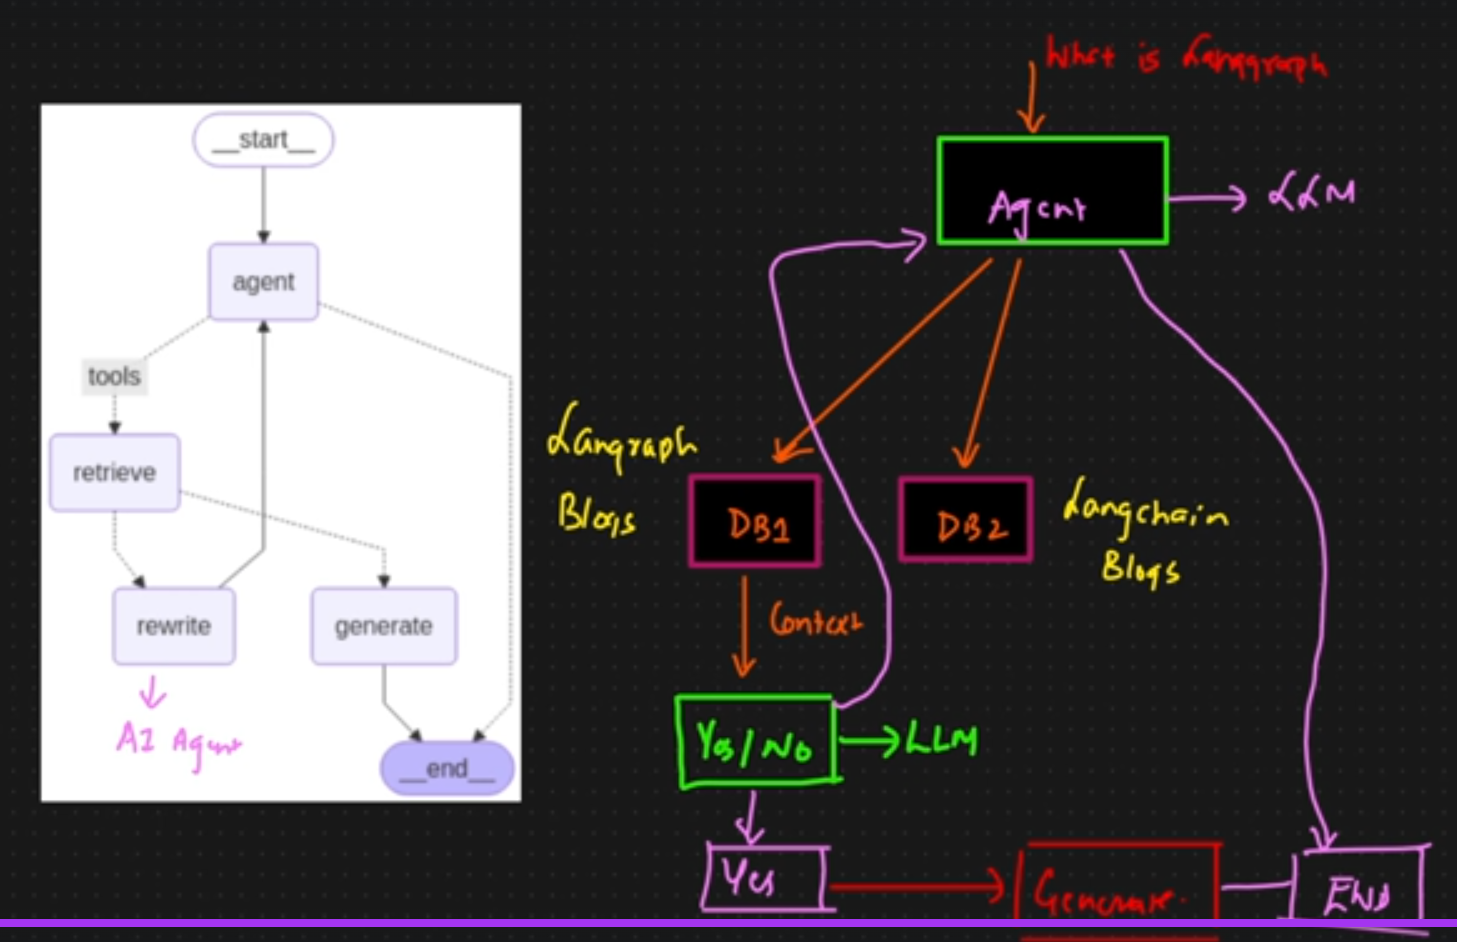

In [17]:
from IPython.display import Image

# Display image from file
Image(filename='ragagent.PNG')


In [2]:
import os
from  dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")

In [3]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [4]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name = "sentence-transformers/all-MiniLM-L6-v2")

e:\GenAi\AgenticAIWorkspace\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
urls = [
    "https://langchain-ai.github.io/langgraph/how-tos/graph-api/#map-reduce-and-the-send-api",
    "https://langchain-ai.github.io/langgraph/concepts/why-langgraph/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/"
]

In [6]:
docs = [WebBaseLoader(url).load() for url in urls]

In [7]:
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/graph-api/#map-reduce-and-the-send-api', 'title': 'Use the Graph API', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nUse the Graph API\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nLangGraph Platform docs are moving! Find the LangGraph Platform docs at the new LangChain Docs site!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Use the Graph API\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n      

In [8]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size =1000,chunk_overlap = 100)
docs_splits = text_splitter.split_documents(docs_list)
print(docs_splits)

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/graph-api/#map-reduce-and-the-send-api', 'title': 'Use the Graph API', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Use the Graph API\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nLangGraph Platform docs are moving! Find the LangGraph Platform docs at the new LangChain Docs site!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Use the Graph API\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \

In [9]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(
    documents=docs_splits,
    embedding=embeddings
)

retriever = vectorstore.as_retriever()

e:\GenAi\AgenticAIWorkspace\venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [10]:
### Converting Retriever to Retriever Tools
from langchain.tools.retriever import create_retriever_tool

retriever_rool = create_retriever_tool(
    retriever,
    "Retriever_vectir_db_blog",
    "Search and Run information about Langgraph"
)

In [11]:
retriever_rool

Tool(name='Retriever_vectir_db_blog', description='Search and Run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000222965BE0E0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000222965B8400>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x00000222965BF250>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000222965B8400>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_co

### For Langchain blogs - we create separate vector db

In [14]:
langchain_urls = [
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs_langchain = [WebBaseLoader(url).load() for url in urls]
docs_langchain

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/graph-api/#map-reduce-and-the-send-api', 'title': 'Use the Graph API', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nUse the Graph API\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nLangGraph Platform docs are moving! Find the LangGraph Platform docs at the new LangChain Docs site!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Use the Graph API\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n      

In [15]:
docs_list_langchain = [item for sublist in docs_langchain for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size =1000,chunk_overlap = 100)
docs_splits_langchain = text_splitter.split_documents(docs_list_langchain)
print(docs_splits_langchain)

vectorstorelangchain = FAISS.from_documents(
    documents=docs_splits_langchain,
    embedding=embeddings
)

retrieverlangchain = vectorstorelangchain.as_retriever()

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/graph-api/#map-reduce-and-the-send-api', 'title': 'Use the Graph API', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Use the Graph API\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nLangGraph Platform docs are moving! Find the LangGraph Platform docs at the new LangChain Docs site!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Use the Graph API\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \

e:\GenAi\AgenticAIWorkspace\venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [16]:
retriever_rool_langchain = create_retriever_tool(
    retrieverlangchain,
    "Retriever_vectir_db_blog",
    "Search and Run information about Langgraph"
)

In [52]:
tools = [retriever_rool,retriever_rool_langchain]

## Langgraph Workflow

In [43]:
from typing import Annotated,Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    
    messages:Annotated[Sequence[BaseMessage],add_messages]

In [44]:
from langchain_groq import ChatGroq

llm = ChatGroq(model = "gemma2-9b-it")
llm.invoke("Hii")

AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.00117058, 'queue_time': 0.252365671, 'total_time': 0.028443307}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--4176f9c4-e8a2-4af7-a8ed-684fa877721a-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})

In [45]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given 
    the question, it will decide to retrieve using the retriever tool or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print(" ------ CALL AGENT ------")
    messages = state["messages"]
    model = ChatGroq(model = "gemma2-9b-it")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    return {"messages" : [response]}

In [46]:
from langchain import hub
from typing import Annotated,Literal,Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_groq import ChatGroq

from pydantic import BaseModel,Field

In [56]:
### Edges

def grade_documents(state) -> Literal["generate","rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print(" ---- CHECK RELEVANCE ------ ")

    ### Data Model
    class grade(BaseModel):
        """Binary score for relevance check"""
        binary_score : str = Field(description="Relevance score 'yes' or 'no' ")

    model  = ChatGroq(model = "gemma2-9b-it")

    llm_with_tool = model.with_structured_output(grade)

    prompt = PromptTemplate(
        template = """You are a gradeassessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning relate to the user question it as relevant . \n           
        Given a binary score 'yes' or 'no' score to indicate whether the document is relevant to question""",
        input_variables=["context","question"]
    )

    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question":question,"context":docs})

    score = scored_result.binary_score

    if score == "yes":
        print(" --- Decision: DOCS RELEVANT ---- ")
        return "generate"
    else:
        print(" --- Decision: DOCS NOT RELEVANT ---- ")
        return "rewrite"


In [58]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model = "gemma2-9b-it")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [59]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="gemma2-9b-it")
    response = model.invoke(msg)
    return {"messages": [response]}

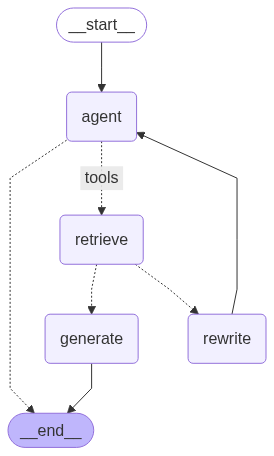

In [60]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_rool,retriever_rool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [63]:
graph.invoke({"messages":"what is Langgraph"})

 ------ CALL AGENT ------


e:\GenAi\AgenticAIWorkspace\venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


 ---- CHECK RELEVANCE ------ 
 --- Decision: DOCS RELEVANT ---- 
---GENERATE---


{'messages': [HumanMessage(content='what is Langgraph', additional_kwargs={}, response_metadata={}, id='7236ccce-7bf1-4f42-b082-d0554d26a3e6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'bsx59anah', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'Retriever_vectir_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 1087, 'total_tokens': 1177, 'completion_time': 0.163636364, 'prompt_time': 0.02093296, 'queue_time': 0.254437161, 'total_time': 0.184569324}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c7acbf84-7bd7-46de-a78d-2b3685d5da5d-0', tool_calls=[{'name': 'Retriever_vectir_db_blog', 'args': {'query': 'Langgraph'}, 'id': 'bsx59anah', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1087, 'output_tokens': 90, 'total_tokens': 1177}),
  ToolMessage(content='Learn LangGraph basic

In [64]:
graph.invoke({"messages":"what is apple"})

 ------ CALL AGENT ------


e:\GenAi\AgenticAIWorkspace\venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


 ---- CHECK RELEVANCE ------ 
 --- Decision: DOCS NOT RELEVANT ---- 
---TRANSFORM QUERY---
 ------ CALL AGENT ------


{'messages': [HumanMessage(content='what is apple', additional_kwargs={}, response_metadata={}, id='d70c6645-3c73-4d54-b69c-e1b42f2a46bc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'agvje0vrw', 'function': {'arguments': '{"query":"What is apple"}', 'name': 'Retriever_vectir_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1086, 'total_tokens': 1177, 'completion_time': 0.165454545, 'prompt_time': 0.02084041, 'queue_time': 0.251857981, 'total_time': 0.186294955}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b603e6c4-d091-461b-addd-4b06a683ad76-0', tool_calls=[{'name': 'Retriever_vectir_db_blog', 'args': {'query': 'What is apple'}, 'id': 'agvje0vrw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1086, 'output_tokens': 91, 'total_tokens': 1177}),
  ToolMessage(content='{\'generate_topic